In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
bank = pd.read_csv("bank-full-cleaned.csv")

In [4]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank['default'] = bank['default'].map( {'yes':1 ,'no':0}) 

In [10]:
bank['housing'] = bank['housing'].map( {'yes':1 ,'no':0}) 

In [11]:
bank['loan'] = bank['loan'].map(  {'yes':1 ,'no':0}) 

In [12]:
bank['y'] = bank['y'].map( {'yes':1 ,'no':0}) 

In [13]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [14]:
#Dropping unknow values form dataset
bank.drop(bank[bank['job'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['marital'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['education'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['default'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['housing'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['loan'] == 'unknown' ].index , inplace=True)

In [15]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [16]:
bank.y.value_counts()

0    38172
1     5021
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

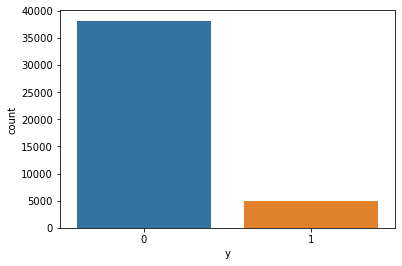

In [17]:
sns.countplot(x="y", data=bank)

In [18]:
bank.loan.value_counts()

0    36086
1     7107
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan', ylabel='count'>

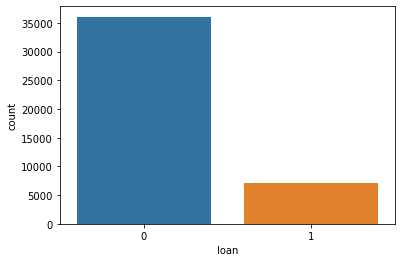

In [19]:
sns.countplot(x="loan", data=bank)

In [20]:
cNoLoan = len(bank[bank.y == 0])
cHaveLoan = len(bank[bank.y == 1])
print("Percentage of Customer can't Have a Loan: {:.2f}%".format((cNoLoan / (len(bank.y))*100)))
print("Percentage of Customer can Have a Loan: {:.2f}%".format((cHaveLoan / (len(bank.y))*100)))

Percentage of Customer can't Have a Loan: 88.38%
Percentage of Customer can Have a Loan: 11.62%


In [21]:
bank.groupby('y').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
y,,,,,,,,,,
0,40.669679,0.019229,1297.333176,0.587289,0.173792,15.900529,221.115949,2.838704,36.709394,0.507230
1,41.481777,0.009560,1785.043019,0.373232,0.094204,15.116710,541.191994,2.145987,68.492731,1.175065


<AxesSubplot:xlabel='y', ylabel='count'>

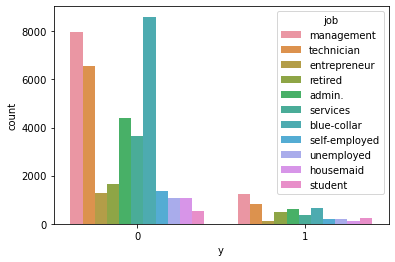

In [22]:
sns.countplot(x="y",hue = "job", data=bank)

<AxesSubplot:xlabel='marital', ylabel='count'>

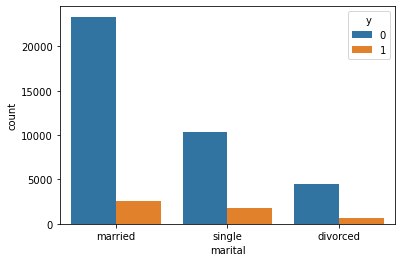

In [23]:
sns.countplot(x="marital",hue = "y", data=bank)

In [24]:
bank['education'].value_counts()

secondary    23131
tertiary     13262
primary       6800
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

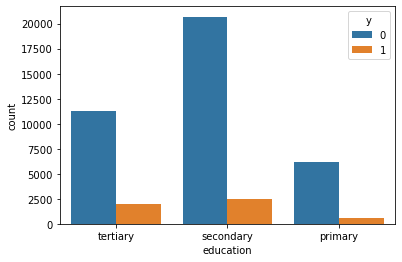

In [25]:
sns.countplot(x="education",hue = "y", data=bank)

<AxesSubplot:xlabel='contact', ylabel='count'>

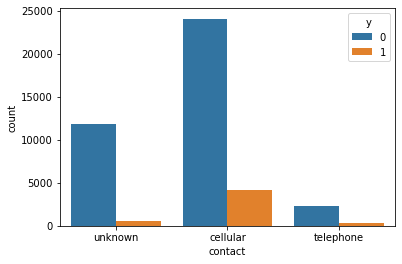

In [26]:
sns.countplot(x="contact",hue = "y", data=bank)

<AxesSubplot:xlabel='y', ylabel='count'>

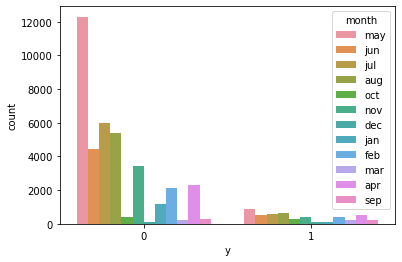

In [27]:
sns.countplot(x="y",hue = "month", data=bank)

<AxesSubplot:xlabel='y', ylabel='count'>

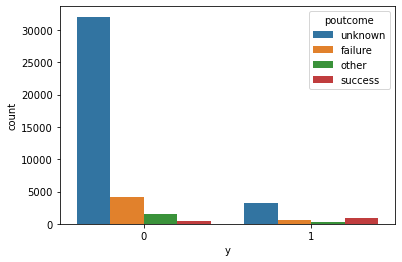

In [28]:
sns.countplot(x="y",hue = "poutcome", data=bank)

In [29]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

C:\Users\prani\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

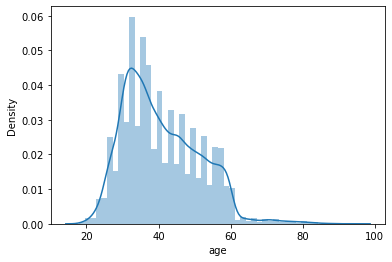

In [30]:
sns.distplot(bank.age)

C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

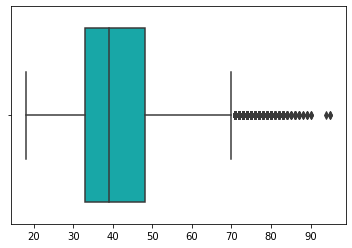

In [31]:
sns.boxplot(bank.age.values,color = 'c')

C:\Users\prani\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

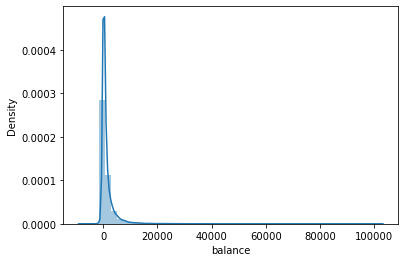

In [32]:
sns.distplot(bank.balance)

C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

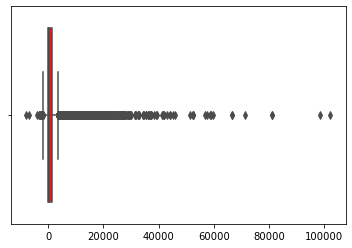

In [33]:
sns.boxplot(bank.balance.values,color = 'r')

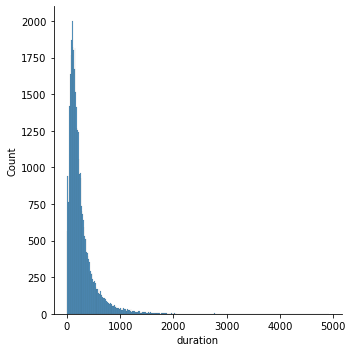

In [34]:
sns.displot(bank.duration)

C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

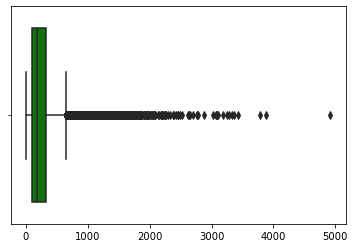

In [35]:
sns.boxplot(bank.duration.values,color = 'g')

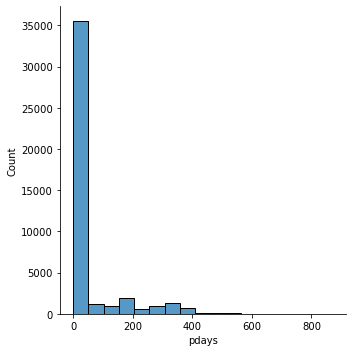

In [36]:
sns.displot(bank.pdays)

C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

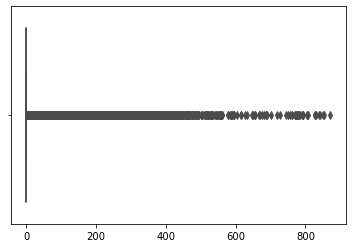

In [37]:
sns.boxplot(bank.pdays.values, color = 'b')

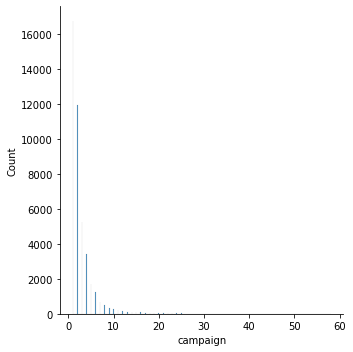

In [38]:
sns.displot(bank.campaign)

C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

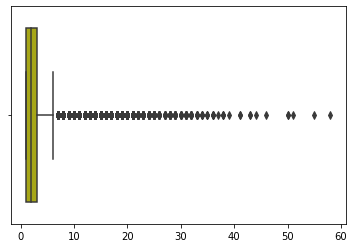

In [39]:
sns.boxplot(bank.campaign.values, color = 'y')

In [40]:
cols=["age","duration","campaign","pdays","previous","balance"]
for i in cols:
    print(f"Skewness {i} : " + str(bank[i].skew()))

Skewness age : 0.6978356364509636
Skewness duration : 3.1701799697784785
Skewness campaign : 4.7924941810208885
Skewness pdays : 2.608337543002269
Skewness previous : 42.08877792244101
Skewness balance : 8.400120937754398


In [43]:
From the above box plots and distributions and skewness, 
It is clear that there are extreme values but not outliers and 
As we can observe from the skewness index values, 
It is clear that skewness is positive for all and that states mean and median are greater than mode.
Based on above skewness values previous variable of bank data has high skewness.

SyntaxError: invalid syntax (<ipython-input-43-ae961cf3f0d5>, line 1)

In [44]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [57]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0
10,41,admin.,divorced,secondary,0,270,1,0,unknown,5,may,222,1,-1,0,unknown,0
11,29,admin.,single,secondary,0,390,1,0,unknown,5,may,137,1,-1,0,unknown,0


Text(0.5, 1.0, 'Term deposit subscribed based on pdays')

<Figure size 1008x432 with 0 Axes>

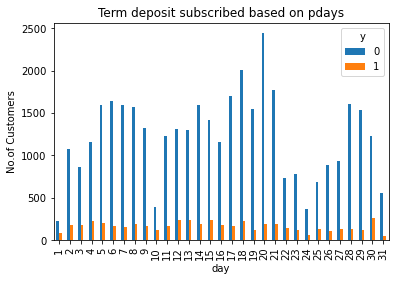

In [82]:
plotter = bank.groupby(["day","y"]).y.count()
plt.figure(figsize=(14,6))
plotter.unstack().plot(kind="bar")
plt.xticks()
plt.ylabel("No.of Customers")
plt.title("Term deposit subscribed based on pdays")

Text(0.5, 1.0, 'term_deposit_subscribed based on education')

<Figure size 1008x432 with 0 Axes>

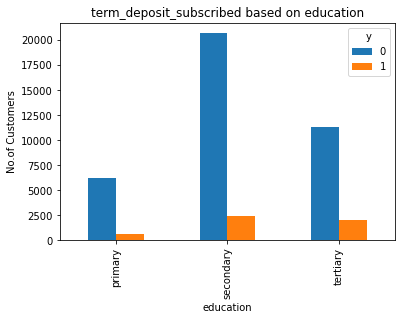

In [54]:
plotter = bank.groupby(["education","y"]).y.count()
plt.figure(figsize=(14,6))
plotter.unstack().plot(kind="bar")
plt.xticks()
plt.ylabel("No.of Customers")
plt.title("Term deposit subscribed based on education")

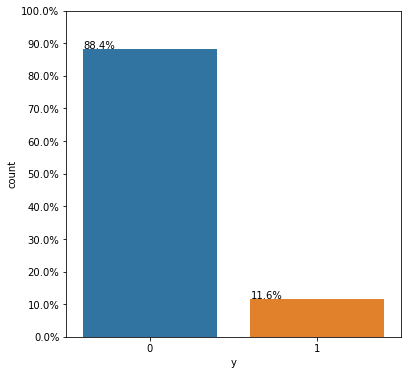

In [146]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
figure(figsize=(6,6))
total=len(bank['y'])
plot=sns.countplot(x=bank['y'],data=bank)
#plot.patches gives x,y coordinate,height width and angle and using this i have converted the labels into the perctage
#to make it interpretable.
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.show()

Text(0.5, 1.0, 'Term deposit subscribed based on education')

<Figure size 7200x3600 with 0 Axes>

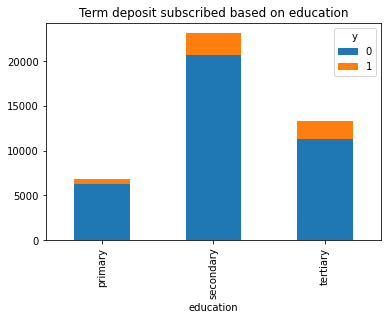

In [55]:
plot2 =bank.groupby(["education","y"]).y.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Term deposit subscribed based on education")

Text(0.5, 1.0, 'Term deposit subscribed based on housing')

<Figure size 7200x3600 with 0 Axes>

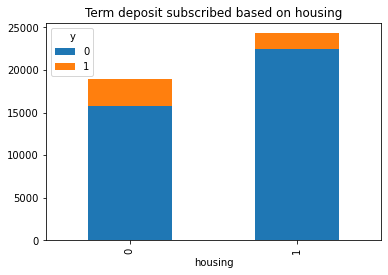

In [59]:
plot2 =bank.groupby(["housing","y"]).y.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Term deposit subscribed based on housing")

Text(0.5, 1.0, 'Term deposit subscribed based on marital')

<Figure size 7200x3600 with 0 Axes>

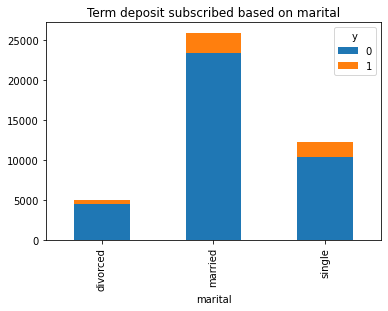

In [60]:
plot2 =bank.groupby(["marital","y"]).y.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Term deposit subscribed based on marital")

Text(0.5, 1.0, 'Term deposit subscribed based on job')

<Figure size 7200x3600 with 0 Axes>

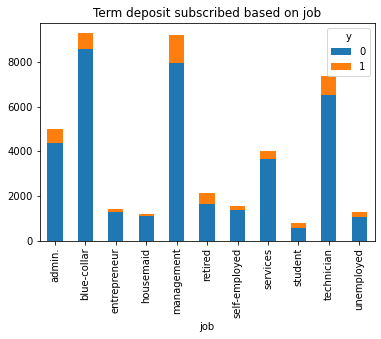

In [61]:
plot2 =bank.groupby(["job","y"]).y.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Term deposit subscribed based on job")

Text(0.5, 1.0, 'Term deposit subscribed based on month')

<Figure size 7200x3600 with 0 Axes>

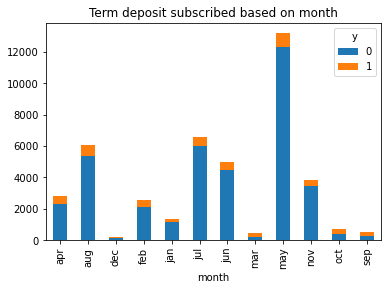

In [62]:
plot2 =bank.groupby(["month","y"]).y.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Term deposit subscribed based on month")

Text(0.5, 1.0, 'Term deposit subscribed based on contact')

<Figure size 7200x3600 with 0 Axes>

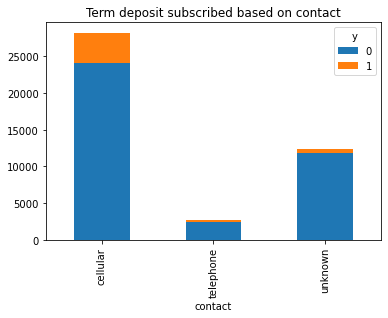

In [64]:
plot2 =bank.groupby(["contact","y"]).y.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Term deposit subscribed based on contact")

Text(0.5, 1.0, 'Term deposit subscribed based on education')

<Figure size 7200x3600 with 0 Axes>

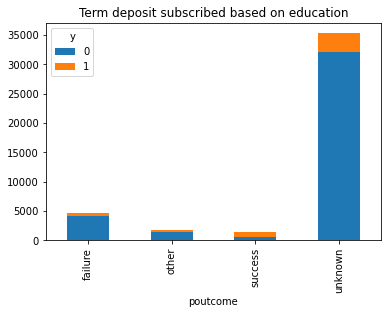

In [141]:
plot2 =bank.groupby(["poutcome","y"]).y.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Term deposit subscribed based on education")

Text(0.5, 1.0, 'Term deposit subscribed based on loan')

<Figure size 7200x3600 with 0 Axes>

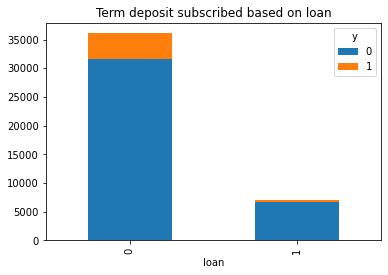

In [66]:
plot2 =bank.groupby(["loan","y"]).y.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Term deposit subscribed based on loan")

Text(0.5, 1.0, 'Term deposit subscribed based on campaign')

<Figure size 7200x3600 with 0 Axes>

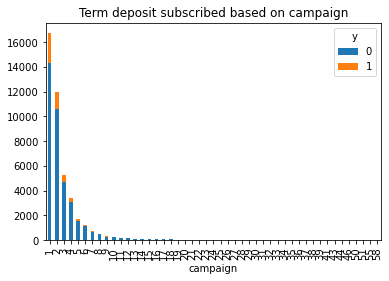

In [67]:
plot2 =bank.groupby(["campaign","y"]).y.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Term deposit subscribed based on campaign")

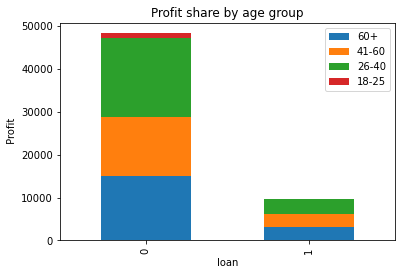

In [77]:
import pandas as pd
data3 = bank[(bank['age']>18) & (bank['age']<=25)].groupby(['loan'])['y'].count()

data1 = bank[(bank['age']>26) & (bank['age']<=40)].groupby(['loan'])['y'].count()
data2 = bank[(bank['age']>41) & (bank['age']<=60)].groupby(['loan'])['y'].count()
data4 = bank[(bank['age']>41)].groupby(['loan'])['y'].count()
df=pd.DataFrame({'60+':data4,'41-60':data2,'26-40':data1,'18-25':data3 })
ax = df.plot(kind='bar', stacked=True, width = 0.55)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Profit share by age group")
plt.ylabel(' Profit')
plt.show()

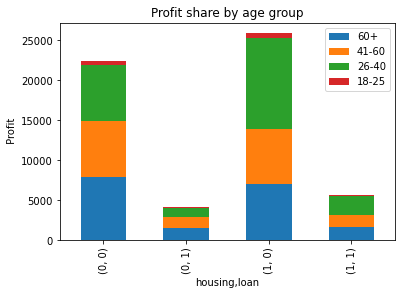

In [79]:
import pandas as pd
data3 = bank[(bank['age']>18) & (bank['age']<=25)].groupby(['housing','loan'])['y'].count()

data1 = bank[(bank['age']>26) & (bank['age']<=40)].groupby(['housing','loan'])['y'].count()
data2 = bank[(bank['age']>41) & (bank['age']<=60)].groupby(['housing','loan'])['y'].count()
data4 = bank[(bank['age']>41)].groupby(['housing','loan'])['y'].count()
df=pd.DataFrame({'60+':data4,'41-60':data2,'26-40':data1,'18-25':data3 })
ax = df.plot(kind='bar', stacked=True, width = 0.55)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Profit share by age group")
plt.ylabel(' Profit')
plt.show()

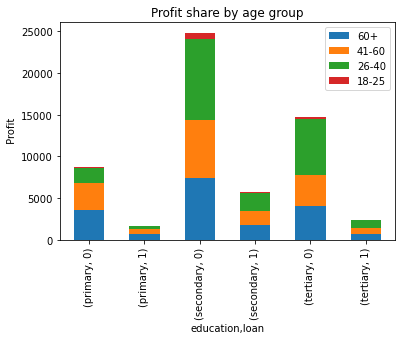

In [80]:
import pandas as pd
data3 = bank[(bank['age']>18) & (bank['age']<=25)].groupby(['education','loan'])['y'].count()

data1 = bank[(bank['age']>26) & (bank['age']<=40)].groupby(['education','loan'])['y'].count()
data2 = bank[(bank['age']>41) & (bank['age']<=60)].groupby(['education','loan'])['y'].count()
data4 = bank[(bank['age']>41)].groupby(['education','loan'])['y'].count()
df=pd.DataFrame({'60+':data4,'41-60':data2,'26-40':data1,'18-25':data3 })
ax = df.plot(kind='bar', stacked=True, width = 0.55)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Profit share by age group")
plt.ylabel(' Profit')
plt.show()

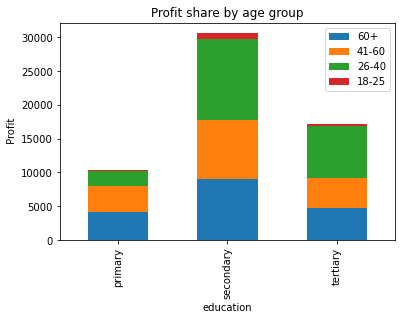

In [147]:
import pandas as pd
data3 = bank[(bank['age']>18) & (bank['age']<=25)].groupby(['education'])['y'].count()

data1 = bank[(bank['age']>26) & (bank['age']<=40)].groupby(['education'])['y'].count()
data2 = bank[(bank['age']>41) & (bank['age']<=60)].groupby(['education'])['y'].count()
data4 = bank[(bank['age']>41)].groupby(['education'])['y'].count()
df=pd.DataFrame({'60+':data4,'41-60':data2,'26-40':data1,'18-25':data3 })
ax = df.plot(kind='bar', stacked=True, width = 0.55)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Profit share by age group")
plt.ylabel(' Profit')
plt.show()

In [88]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

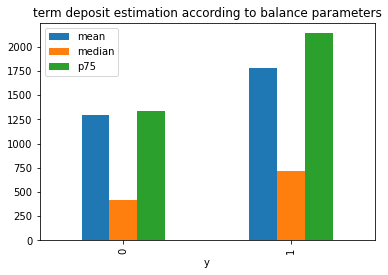

In [93]:

bank.groupby('y')['balance'].aggregate(['mean','median',p75]).plot.bar()
plt.title("term deposit estimation according to balance parameters")
plt.show()

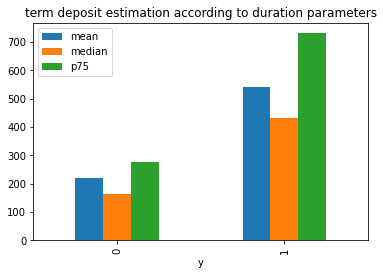

In [94]:

bank.groupby('y')['duration'].aggregate(['mean','median',p75]).plot.bar()
plt.title("term deposit estimation according to duration parameters")
plt.show()

marital    divorced   married    single
education                              
primary    0.139037  0.075475  0.107692
secondary  0.103485  0.094565  0.129228
tertiary   0.138283  0.130044  0.183434


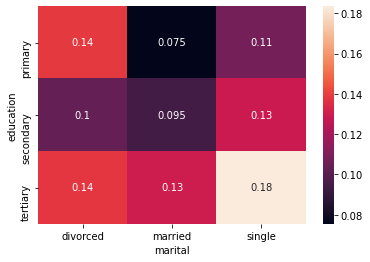

In [97]:
res = pd.pivot_table (data = bank , index = 'education', columns= 'marital', values='y')
print(res)
#create heat map of education vs marital vs y
sns.heatmap(res, annot = True)
plt.show()

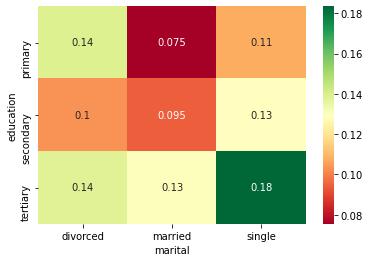

In [98]:
sns.heatmap(res, annot = True, cmap = 'RdYlGn')
plt.show()

marital        divorced   married    single
job                                        
admin.         0.121585  0.113302  0.137337
blue-collar    0.077356  0.062237  0.107572
entrepreneur   0.075145  0.077075  0.110619
housemaid      0.101124  0.071672  0.173913
management     0.125000  0.123115  0.163272
retired        0.288835  0.217178  0.126214
self-employed  0.158273  0.077320  0.197216
services       0.089015  0.073498  0.114359
student        0.200000  0.181818  0.298898
technician     0.081111  0.104455  0.131816
unemployed     0.152941  0.132867  0.197943


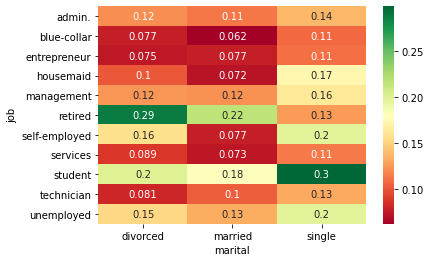

In [99]:
res = pd.pivot_table (data = bank , index = 'job', columns= 'marital', values='y')
print(res)
sns.heatmap(res, annot = True, cmap = 'RdYlGn')
plt.show()

poutcome    failure     other   success   unknown
education                                        
primary    0.088924  0.143443  0.606061  0.071935
secondary  0.108140  0.139959  0.639881  0.084370
tertiary   0.168683  0.220588  0.656452  0.114420


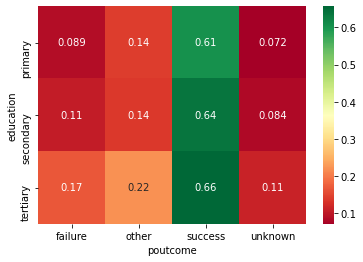

In [100]:
res = pd.pivot_table (data = bank , index = 'education', columns= 'poutcome', values='y')
print(res)
sns.heatmap(res, annot = True, cmap = 'RdYlGn')
plt.show()

In [102]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0
10,41,admin.,divorced,secondary,0,270,1,0,unknown,5,may,222,1,-1,0,unknown,0
11,29,admin.,single,secondary,0,390,1,0,unknown,5,may,137,1,-1,0,unknown,0


loan            0         1
housing                    
0        0.182219  0.076705
1        0.080846  0.059893


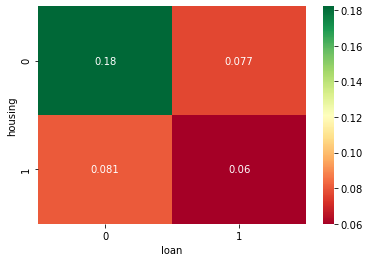

In [103]:
res = pd.pivot_table (data = bank , index = 'housing', columns= 'loan', values='y')
print(res)
sns.heatmap(res, annot = True, cmap = 'RdYlGn')
plt.show()

marital  divorced   married    single
housing                              
0        0.159729  0.146735  0.209117
1        0.086941  0.065278  0.099238


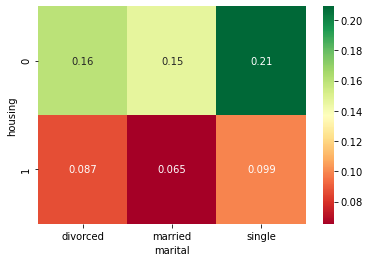

In [104]:
res = pd.pivot_table (data = bank , index = 'housing', columns= 'marital', values='y')
print(res)
sns.heatmap(res, annot = True, cmap = 'RdYlGn')
plt.show()

In [105]:
bank['duration'] = bank['duration'].apply(lambda n:n/60).round(2)

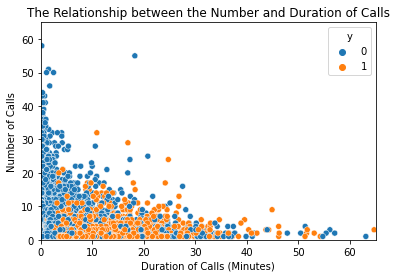

In [106]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = bank,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
# Annotation
plt.show()

In [107]:
bank['pdays'] = np.where(bank['pdays'] == 999,bank[bank['pdays'] < 999]['pdays'].mean(),bank['pdays'])


In [108]:
bank['pdays']

0         -1.0
1         -1.0
2         -1.0
5         -1.0
6         -1.0
         ...  
45206     -1.0
45207     -1.0
45208    184.0
45209     -1.0
45210    188.0
Name: pdays, Length: 43193, dtype: float64

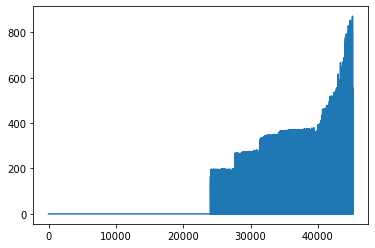

In [109]:
plt.plot(bank['pdays'])

In [113]:
#undersampling
majority_class_len = len(bank[bank['y'] == 0])
minority_class_len = len(bank[bank.y == 1])
print("minority class length: ",minority_class_len)
print("majority class length: ",majority_class_len)

minority class length:  5021
majority class length:  38172


In [114]:
majority_class_indices = bank[bank['y'] == 0].index
print(majority_class_indices)

Int64Index([    0,     1,     2,     5,     6,     7,     8,     9,    10,
               11,
            ...
            45180, 45181, 45183, 45184, 45189, 45194, 45198, 45199, 45209,
            45210],
           dtype='int64', length=38172)


In [115]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))


5021


In [116]:
minority_class_indices = bank[bank['y'] == 1].index
print(minority_class_indices)

Int64Index([   83,    86,    87,   129,   168,   270,   388,   390,   457,
              474,
            ...
            45197, 45200, 45201, 45202, 45203, 45204, 45205, 45206, 45207,
            45208],
           dtype='int64', length=5021)


<AxesSubplot:xlabel='y', ylabel='count'>

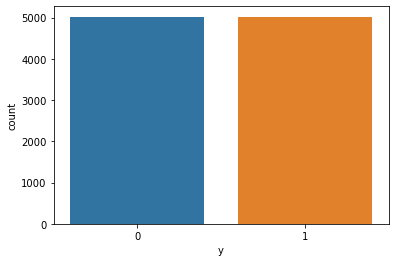

In [118]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
under_sample = bank.loc[under_sample_indices]
sns.countplot(x='y', data=under_sample)

['job', 'marital', 'education', 'contact', 'month', 'poutcome']


C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prani\anacond

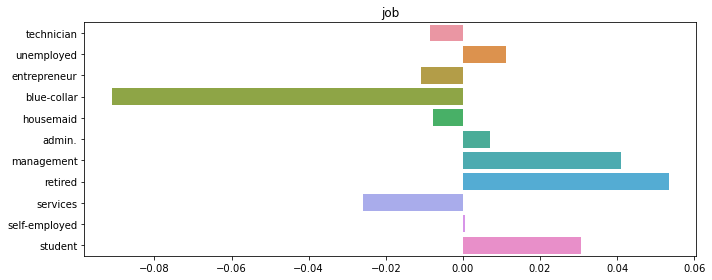

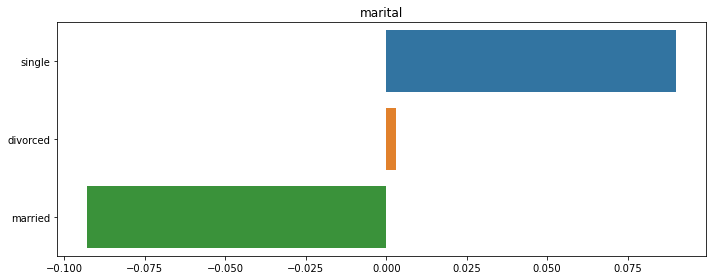

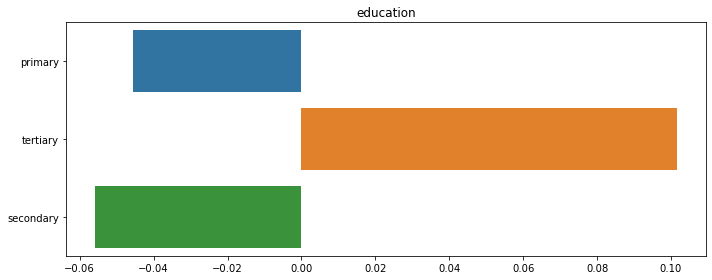

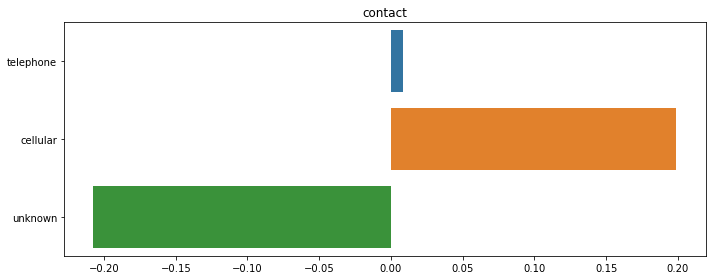

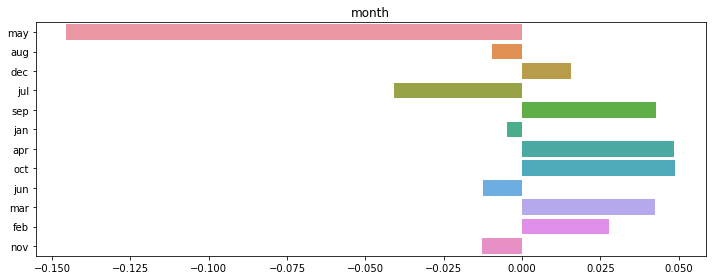

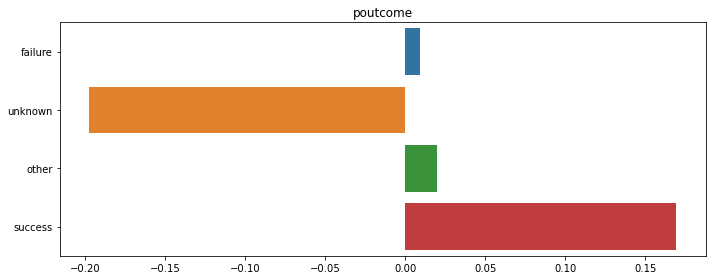

In [123]:
category_cols = list(bank.select_dtypes(include=['object']))
print(category_cols)
for col in category_cols:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = bank.loc[bank.y.values == 1, col].value_counts() 
    neg_counts = bank.loc[bank.y.values == 0, col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (bank.y.values == 1).sum()
    freq_neg = (bank.y.values == 0).sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

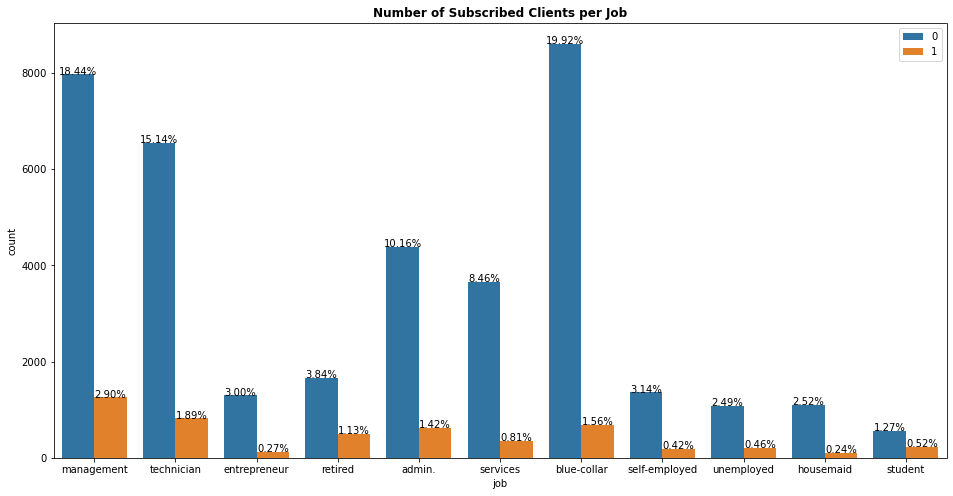

In [128]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per Job', fontweight='bold')
ax=sns.countplot(data=bank, x='job', hue='y')
size = float(bank.shape[0])
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(False)
plt.legend(loc='best')
plt.show()

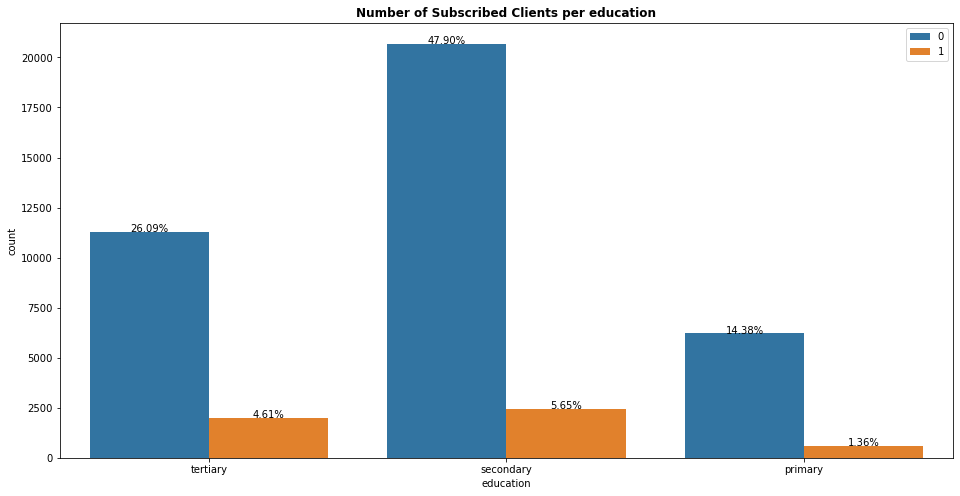

In [130]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per education', fontweight='bold')
ax=sns.countplot(data=bank, x='education', hue='y')
size = float(bank.shape[0])
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(False)
plt.legend(loc='best')
plt.show()

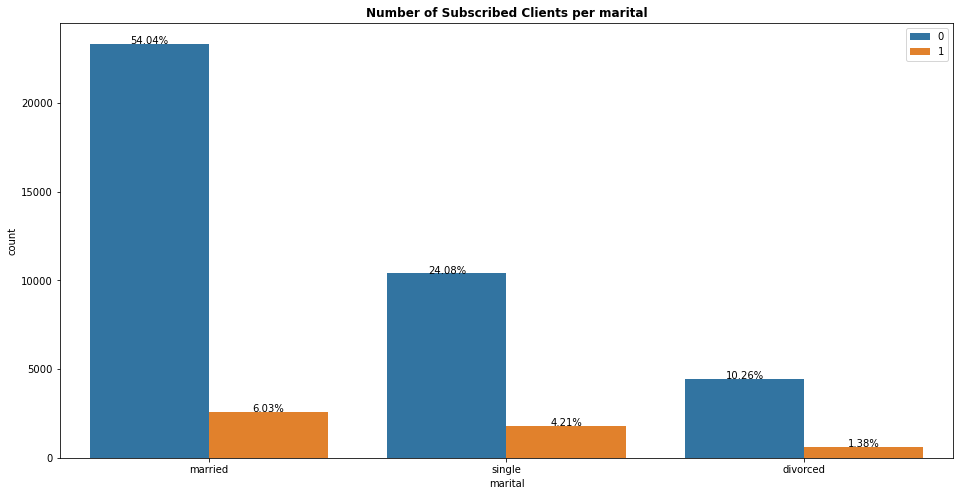

In [132]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per marital', fontweight='bold')
ax=sns.countplot(data=bank, x='marital', hue='y')
size = float(bank.shape[0])
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(False)
plt.legend(loc='best')
plt.show()

No handles with labels found to put in legend.


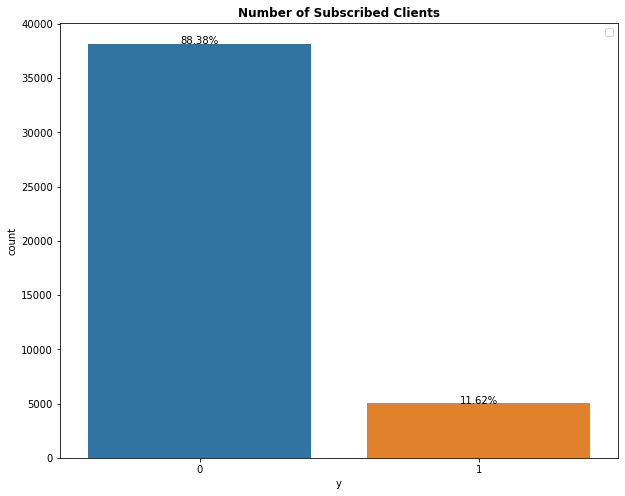

In [134]:
fig = plt.figure(figsize=(10,8)) 
plt.title('Number of Subscribed Clients', fontweight='bold')
ax=sns.countplot(x='y', data=bank)
size = float(bank.shape[0])
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(False)
plt.legend(loc='best')
plt.show()

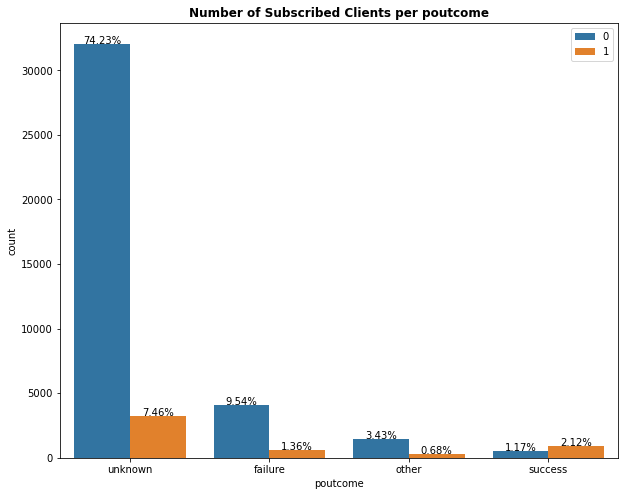

In [136]:
fig = plt.figure(figsize=(10,8)) 
plt.title('Number of Subscribed Clients per poutcome', fontweight='bold')
ax=sns.countplot(x='poutcome', hue='y',data=bank)
size = float(bank.shape[0])
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(False)
plt.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Correlation Matrix')

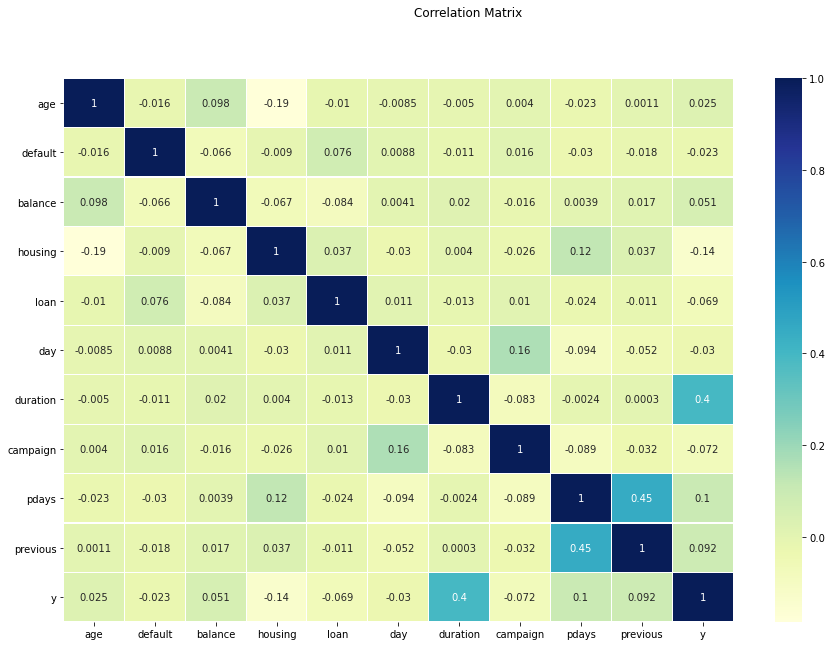

In [137]:
plt.figure(figsize=(15,10))
sns.heatmap(bank.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.suptitle('Correlation Matrix')